In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./Histogram/beach-438500_1280.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist,bins = np.histogram(img.raval(),256,[0,256])



AttributeError: 'numpy.ndarray' object has no attribute 'raval'

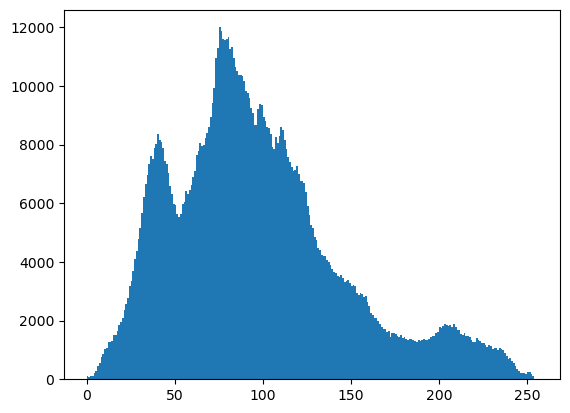

In [36]:
plt.hist(img.ravel(),256,[0,256]); plt.show()



error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'cv::histPrepareImages'


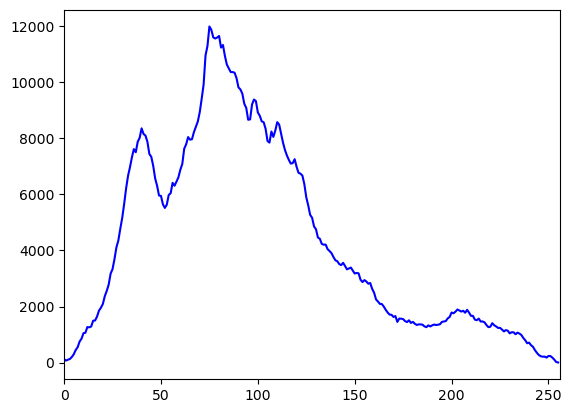

In [31]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


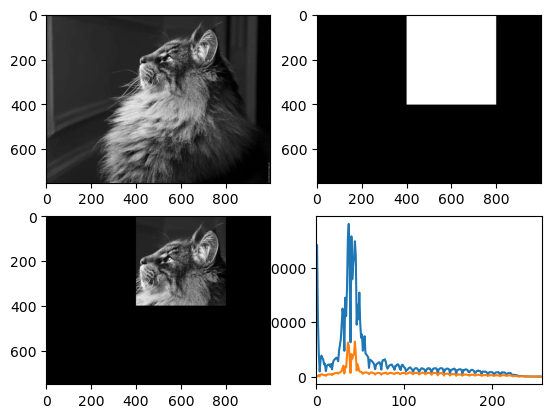

In [49]:
img = cv2.imread('cat.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[0:400, 400:800] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

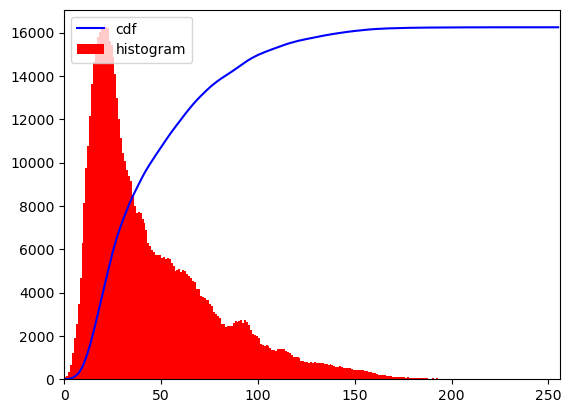

In [53]:
img = cv2.imread('./Histogram/sunset-5163192_960_720.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


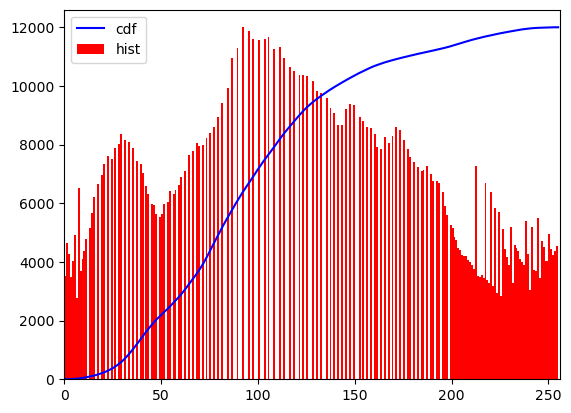

In [62]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf= hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized,color="b")
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','hist'),loc = "upper left")
plt.show()
